### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from scipy import stats
from hurst import compute_Hc
import numpy as np

### Functions

In [2]:
def read_csv(fileName):
    return pd.read_csv(fileName, header = None)
def normalize(data):
    return (data - data.mean()) / (data.max() - data.min())

def plot_probability_density(series1,series2,series3):
    fig, axs = plt.subplots(1,3, sharex=True, figsize = (19,4))
    fig.suptitle("Probability distribution of returns as compared to a gaussian curve")
    for i,series in enumerate([series1,series2,series3]):
        sns.kdeplot(series,ax = axs[i], label = f"Series {i+1}")
        sns.kdeplot(np.random.normal(loc = np.mean(series), scale = np.std(series), size = 10**5), label = "Gaussian", ax = axs[i])
        axs[i].set_xlabel("Returns")
        axs[i].set_xlim(-0.3,0.3)
        if i == 1:
            axs[i].set_ylim(10**-2,10)
        else:
            axs[i].set_ylim((10**-1)*3,3)
        axs[i].set_yscale('log')
        axs[i].set_ylabel("Proabability")
        
        axs[i].legend()
        
def plot_acf_single(series, ax, color, lags, label):
    x,y,_,__ = ax.acorr(series, maxlags = lags, color = color, alpha =1, label = label)
    ax.legend()

def plot_acf_row(series, title, lags):
    fig, axs = plt.subplots(1,3, figsize = (20,5))
    fig.suptitle(title)
    plot_acf_single(series, axs[0], 'r', lags, "r")
    plot_acf_single(abs(series), axs[1], 'g', lags, "$|r|$")
    plot_acf_single(series**2, axs[2], 'b', lags, "$(r)^2$")
    
def plot_acf_all(lags = 400):
    plot_acf_row(series1, "Series 1", lags)
    plot_acf_row(series2, "Series 2", lags)
    plot_acf_row(series3, "Series 3", lags)
    
    
def hc_all(window):
    o = compute_Hc(series1,kind = "change", min_window = window, simplified=True)[0]
    t = compute_Hc(series2,kind = "change", min_window = window, simplified=True)[0]
    tt = compute_Hc(series3,kind = "change", min_window = window, simplified=True)[0]
    print(o,t,tt)

def plot_hc_single(series,label):
    H, _, (windows, rs) = compute_Hc(series, min_window = 122, kind = 'change', simplified = True)
    x = np.arange(0,10)
    y = H*x
    plt.plot(x,y, label = f"{label} : {round(H,2)}")
    plt.legend()
    
def plot_hc():
    plt.title("Hurst exponent")
    plot_hc_single(series1, "series1")
    plot_hc_single(series2, "series2")
    plot_hc_single(series3, "series3")

def plot_corr_mat():
    fig, axs = plt.subplots(1,3, figsize = (22, 6))
    b = True
    fig.suptitle("Pearson Correlation Matrix")
    for i,df in enumerate([df1,df2,df3]):
        corr = df.corr()
        sns.heatmap(corr,cmap=plt.cm.Oranges, ax = axs[i], cbar = True)
        axs[i].set_title(f"Series {i+1}")
        
def plot_eigvals():
    fig, axs = plt.subplots(1,3,figsize = (20,5))
    fig.suptitle("Eigenvalue Distriution")
    for i,df in enumerate([df1,df2,df3]):
        sns.histplot(np.linalg.eig(df.corr())[0], ax = axs[i])
        if i != 2:
            axs[i].set_xlim(0,7.5)
        axs[i].set_title(f"Series {i+1}")

In [3]:
df1 = read_csv("dataset_1.csv")
df2 = read_csv("dataset_2.csv")
df3 = read_csv("dataset_3.csv")

series1 = normalize(df1[10])
series2 = normalize(df2[10])
series3 = normalize(df3[10])

### Probablity distribution

The figures below are the <b>kernel density approximations</b> of time series from each of the three data sets. The blue line is the kde approximation of the given time series, while the orange curve is how a time series with gaussian returns look like. 

From the figure, <b>we can see that series 1 and 3 and normal, while series 2 has heavier tails</b> compared to a normal distribution. The probability of extreme events is more in the real market, than it is in a perfectly random one. 

Inference from the figure:


- Series 1 : Gaussian [Correlated/uncorrelated]   
- Series 2 : Actual returns   
- Series 3 : Gaussian [Correlated/uncorrelated]      


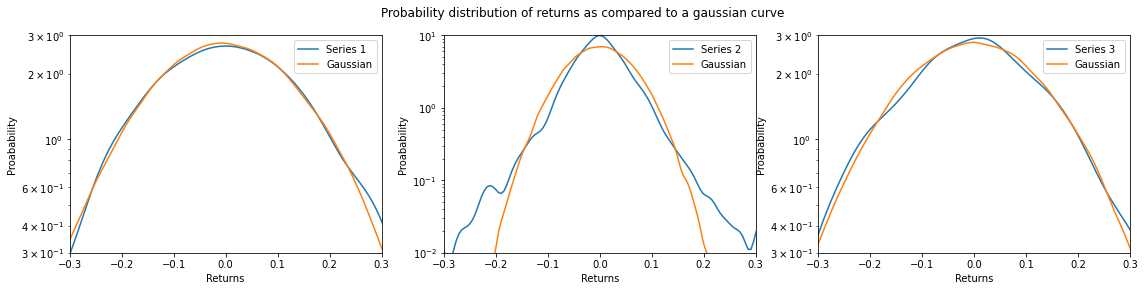

In [4]:
plot_probability_density(series1,series2,series3)

### Hurst Exponent

The hurst exponent measures the memory of the time series. A gaussian series has a hurst exponent of 0.5. We see from the figure that series 1 and 3 have a hurst exponent close to 0.5, while series 2 (from the real world returns) has a hurst exponent of 0.41, <b>indicating that data points in the series are affected by previous data points.</b>

Hurst exponent values
- Series 1 : 0.51 (Gaussian [uncorrelated/correlated])
- Series 2 : 0.41 (Real world returns)
- Series 3 : 0.49 (Gaussian [uncorrelated/correlated])

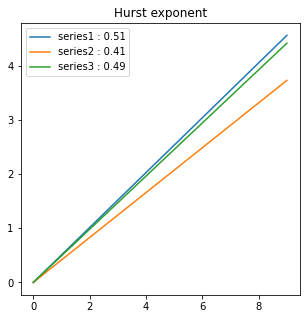

In [5]:
plt.figure(figsize = (5,5))
plot_hc()

### Autocorrelation

Series 2 is showing <b>a decay of autocorrelation of returns</b>, suggesting that dataset 2 has real world returns. The autocorrelations in the other two series are not decaying. 

Inference from the figure:

- Series 1 : Gaussian [Correlated/uncorrelated]   
- Series 2 : Actual returns   
- Series 3 : Gaussian [Correlated/uncorrelated]      

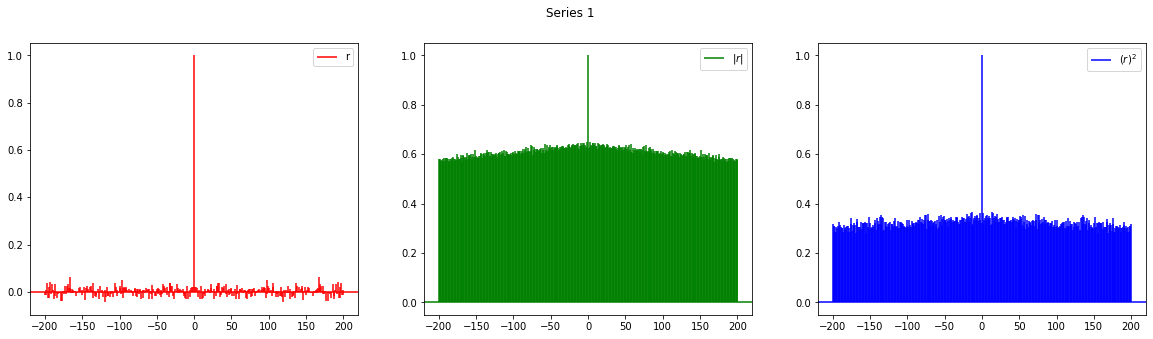

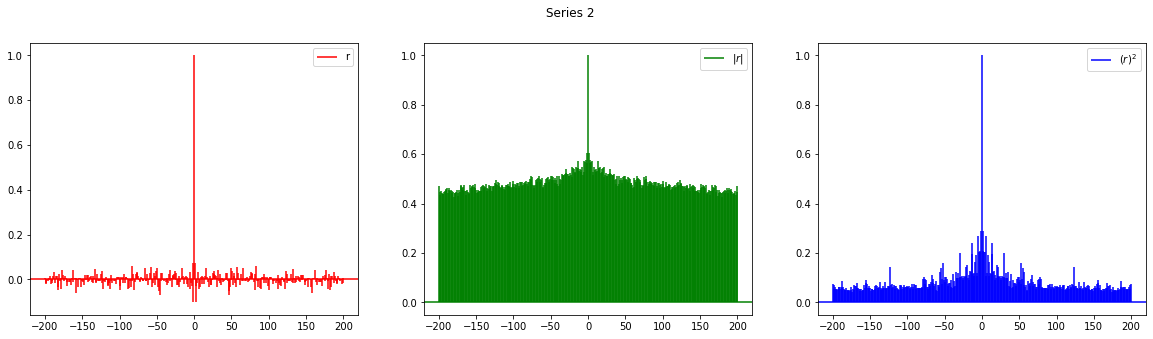

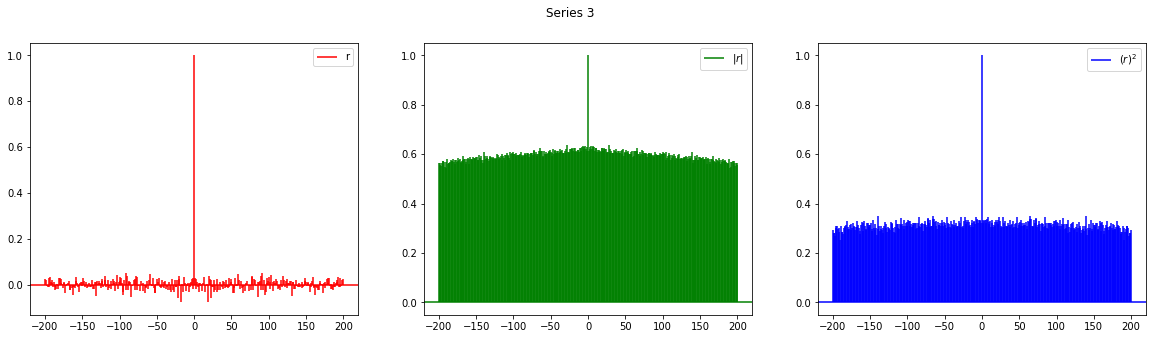

In [6]:
plot_acf_all(200)

### Correlation Matrix

In the following figure, <b>dataset3 is uncorrelated</b>, while the other two datasets are correlated

Inference from the figure:


- Series 1 : Correlated  
- Series 2 : Correlated
- Series 3 : Uncorrelated


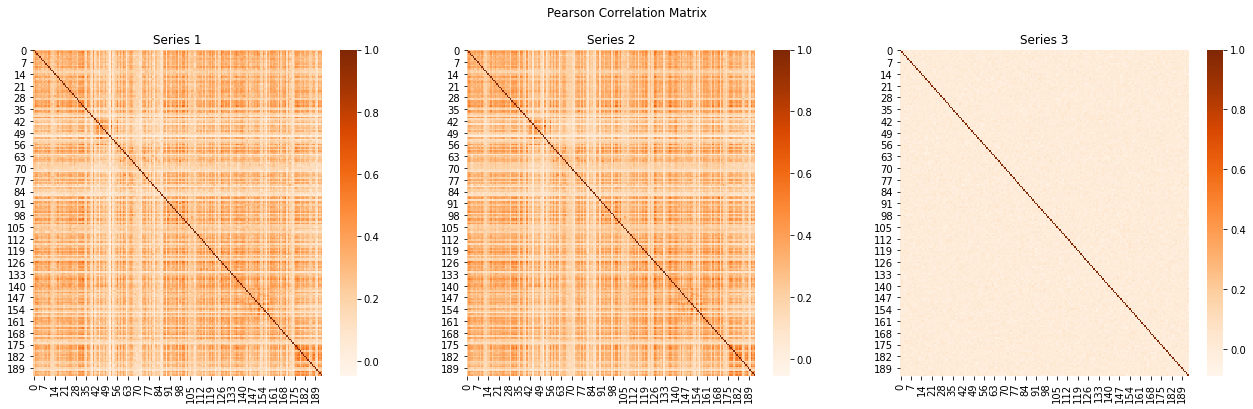

In [7]:
plot_corr_mat()

### Eigenvalue distribution

Inference from the figure:


- Series 1 : Some large eigenvalues are seen, high variance  
- Series 2 : Some large eigenvalues are seen, high variance
- Series 3 : Small eigenvalues, low vairance



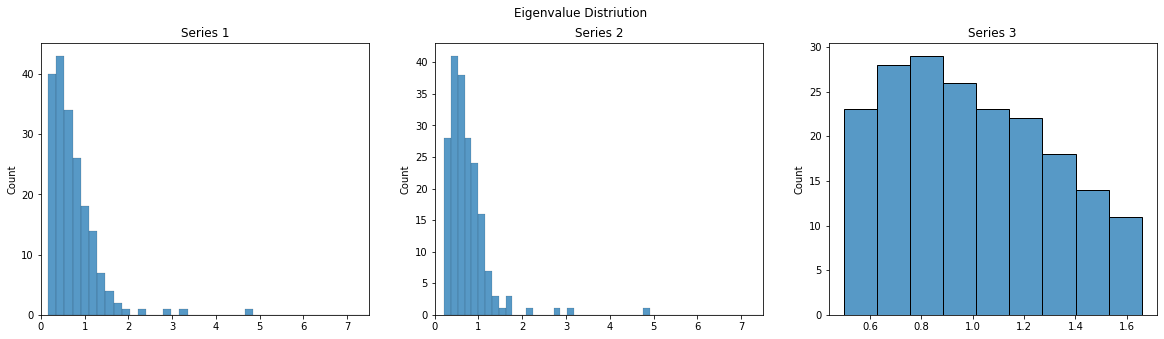

In [8]:
plot_eigvals()

### Final inference

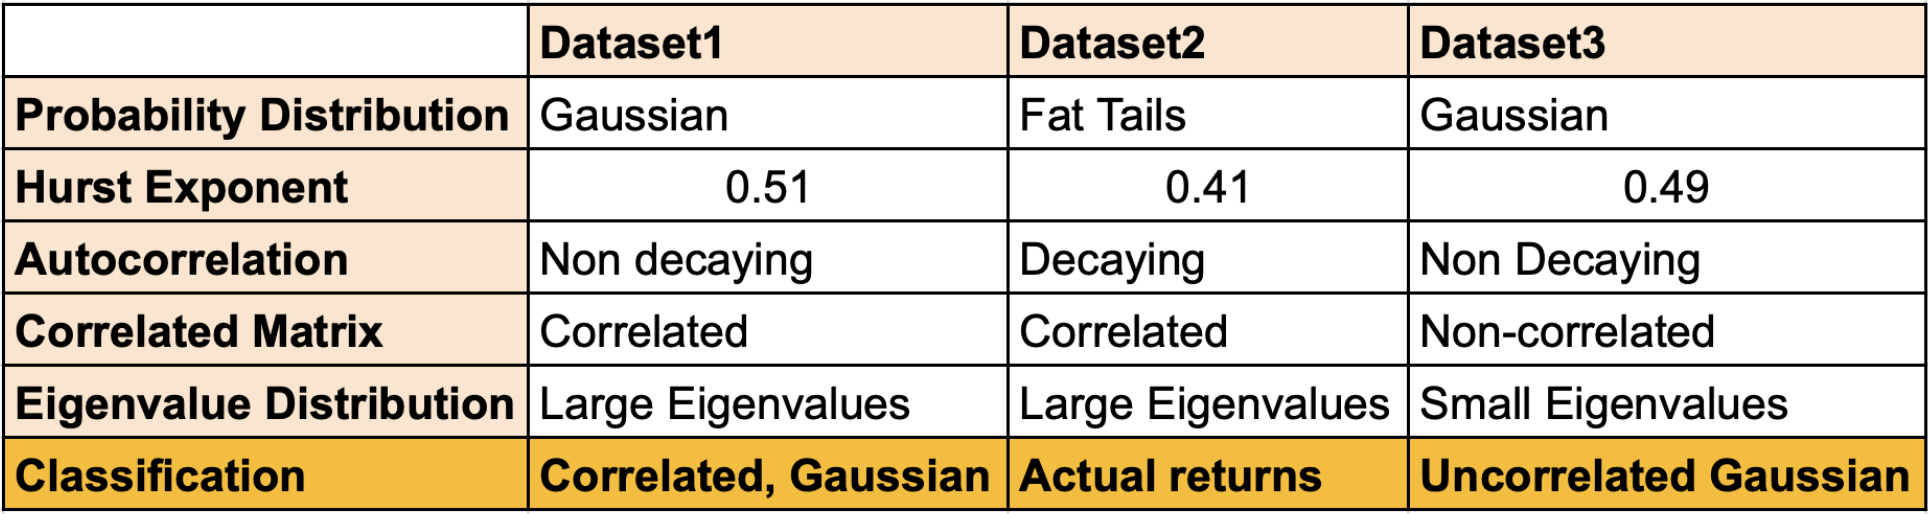

### Agent Based Modelling

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
def simulate(lamb):
    N = 200
    time_steps = 10**4
    w = [1]*N
    for i in range(time_steps):
        i,j = np.random.randint(0,N,2)
        e = np.random.rand()
        if i == j:
            continue
        w[i],w[j] = (lamb*w[i] + e*(1-lamb)*(w[i]+w[j]),
                     lamb*w[j] + (1-e)*(1-lamb)*(w[i]+w[j]))
#     sns.displot(w, bins = 30, kde = True, aspect = 1.5)
    return np.array(w)

def gini(x):
    diffsum = 0
    for i, xi in enumerate(x[:-1], 1):
        diffsum += np.sum(np.abs(xi - x[i:]))
    return diffsum / (len(x)**2 * np.mean(x))

In [ ]:
x = []
y = []
for i in np.linspace(0,1,20):
    x.append(i)
    w = simulate(i) 
    y.append(gini(w))

### Inequality vs Saving Propensity

I plotted the variation of the gini coeffcient with the saving propensity($\lambda$). . My hypothesis is that inquality decreases as saving propensity increases. I've validated this by performing linear regression. 

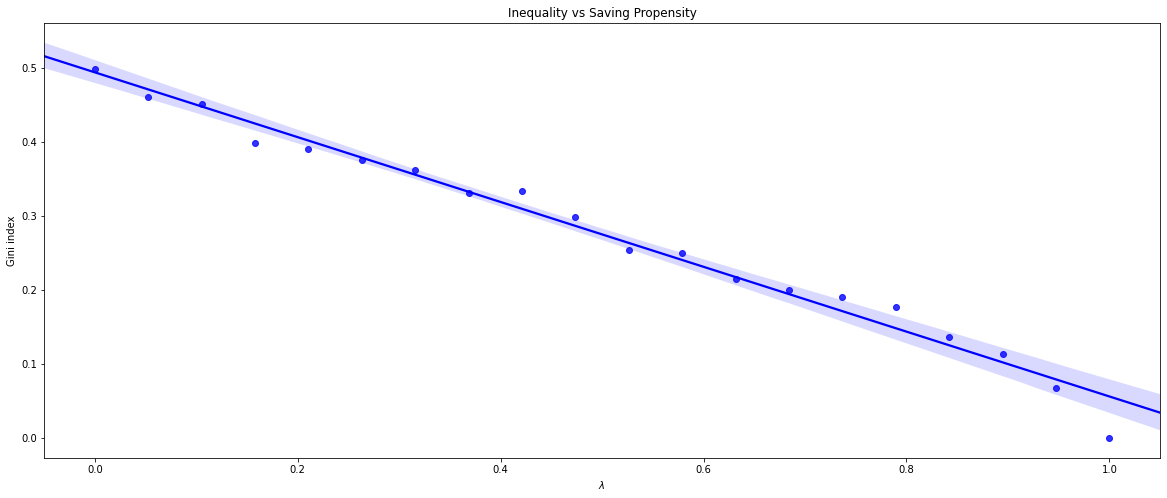

In [13]:
plt.figure(figsize = (20,8))
sns.regplot(x = x,y = y, color = 'b', truncate = False);
plt.xlabel("$\lambda$")
plt.ylabel("Gini index")
plt.title("Inequality vs Saving Propensity")
plt.show()